In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

In [2]:
vaccinations = pd.read_csv("country_vaccinations.csv")
countries = pd.read_csv("country_profile_variables.csv")

In [3]:
max_total_vac = vaccinations.groupby(["country"], sort = False)["total_vaccinations"].max()

In [27]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [32]:
vaccinations = vaccinations[vaccinations.country.isin(countries.country.unique())]

In [42]:
total_vaccinations = vaccinations.groupby(["country"], sort = False)["total_vaccinations"].max()

In [49]:
df = pd.DataFrame()
df['total_vaccinations'] = total_vaccinations.values
df.set_index(total_vaccinations.index, inplace = True)
df

,total_vaccinations
country,
Afghanistan,5751015.0
Albania,2754244.0
Algeria,13704895.0
Andorra,151997.0
Angola,17535411.0
...,...
Uzbekistan,44177104.0
Vanuatu,199464.0
Yemen,807502.0


In [56]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=187)

In [59]:
countries[countries.country == "Albania"]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99


In [58]:
population = []
for country in df.index:
    print(country)
    population.append(countries[countries.country == country]["Population in thousands (2017)"]).values[0]

Afghanistan


AttributeError: 'NoneType' object has no attribute 'values'

In [43]:
total_vaccinations

country
Afghanistan     5751015.0
Albania         2754244.0
Algeria        13704895.0
Andorra          151997.0
Angola         17535411.0
                  ...    
Uzbekistan     44177104.0
Vanuatu          199464.0
Yemen            807502.0
Zambia          3402612.0
Zimbabwe        9039729.0
Name: total_vaccinations, Length: 187, dtype: float64

In [4]:
population = []
for i in max_total_vac.index:
    if i in countries['country'].unique():
        population.append(countries[countries.country == i]["Population in thousands (2017)"].values[0])
    else:
        population.append(0)

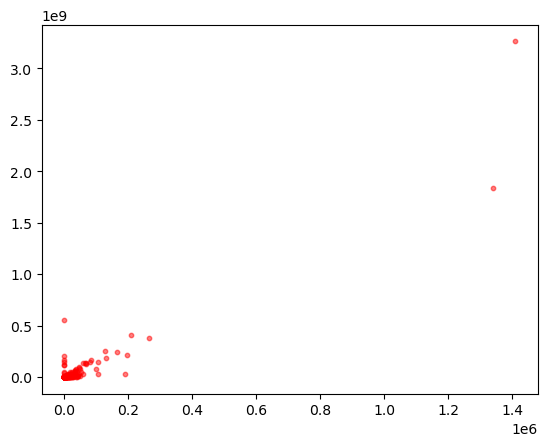

In [23]:
plt.scatter(
    population,
    max_total_vac,
    c = "red",
    s = 10,
    alpha = 0.5,
)

In [14]:
max(max_total_vac)

3263129000.0

In [12]:
max_total_vac.idxmax()

'China'

In [13]:
max_total_vac["China"]

3263129000.0

In [24]:
vaccinations.dropna().head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [15]:
countries[countries.country == "China"]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
45,China,EasternAsia,9600000,1409517,150.1,106.3,11158457,6.9,8109.1,9.2,...,50.3,1080,22.0,10291.9/7.5,101394,87,97.5/93.0,86.6/63.7,0.00,-99
